# Cohort Analysis of Social Media Users

#### Import libraries and load data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Load Data
data = pd.read_csv("processed_data.txt", sep="|")
data.head()

,User ID,Age,EstimatedSalary,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased
0,15624510,19,19000,1,-1.781797,-1.809254,0
1,15810944,35,20000,1,-0.253587,-1.752550,0
2,15668575,26,43000,0,-1.113206,-0.725701,0
3,15603246,27,57000,0,-1.017692,-0.246493,0
4,15804002,19,76000,1,-1.781797,0.311281,0


#### Clustering

In [3]:
# Import library
from sklearn.cluster import KMeans

# For newer versions of Python/Jupyter, change default so that method config attributes always show
from sklearn import set_config
set_config(print_changed_only=False, display='diagram')

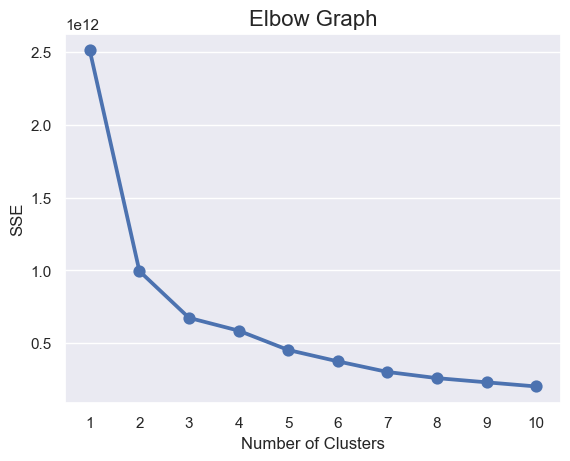

In [4]:
# Define cluster number with elbow method
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    sse[k] = kmeans.inertia_

sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.title("Elbow Graph", fontsize=16)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [5]:
# Initiate model state
kmeans = KMeans(n_clusters=4, random_state=1)

# Model fitting
kmeans.fit(data)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='auto', random_state=1, tol=0.0001, verbose=0)

In [6]:
# Cluster labels
data["Cluster"] = kmeans.labels_
data.head()

,User ID,Age,EstimatedSalary,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased,Cluster
0,15624510,19,19000,1,-1.781797,-1.809254,0,1
1,15810944,35,20000,1,-0.253587,-1.752550,0,0
2,15668575,26,43000,0,-1.113206,-0.725701,0,2
3,15603246,27,57000,0,-1.017692,-0.246493,0,1
4,15804002,19,76000,1,-1.781797,0.311281,0,0


In [11]:
# Metrics on each cluster
data.groupby("Cluster").agg({
    "User ID" : "count",
    "Gender" : "mean",
    "Purchased" : "mean", 
    "Age" : "mean",
    "EstimatedSalary" : "mean"
}).round(2).rename(columns={"User ID" : "Cluster Size"})

,Cluster Size,Gender,Purchased,Age,EstimatedSalary
Cluster,,,,,
0,121,0.45,0.35,37.13,73231.40
1,77,0.44,0.31,37.68,42142.86
2,139,0.55,0.37,37.81,72345.32
3,63,0.51,0.41,38.29,91031.75
